# Bank Marketing com algoritmo K-modes

k-modes clustering algorithm for categorical data.

In [1]:
!pip install kmodes

In [2]:
?KModes

Object `KModes` not found.


## Bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes

## Dados

In [4]:
df = pd.read_csv('bankmarketing.csv', sep=',', encoding='iso-8859-1')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## EDA

In [5]:
df.shape

(41188, 21)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


## Atributos

age : idade (numérica)

job : tipo de trabalho (categorias: 'admin.','blue-collar','entrepreneur(empreendedor)','housemaid','management (gestão)','retired (aposentado)','self-employed (autônomo)','services','student','technician','unemployed (desempregado)','unknown')

marital : estado civil (categorias: 'divorced','married','single','unknown'; obs.: 'divorced' significa divorciado ou viúvo (a))

education: nível escolar (categorias: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

default: inadimplência (categorias: 'no','yes','unknown')

housing: crédito de habitação (categorias: 'no','yes','unknown')

loan: empréstimo pessoal (categorias: 'no','yes','unknown')

contact: contato (categorias: 'cellular','telephone')

month: último mês de contato (categorias: 'jan', 'feb', 'mar', 'april', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')

day_of_week: último dia de contato (categorical: 'mon','tue','wed','thu','fri')

poutcome: resultado do marketing anterior (categorical: 'failure','nonexistent','success')

In [8]:
df2 = df[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [9]:
df3 = df2.copy()

In [10]:
df3['faixa_idade'] = pd.cut(df3['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [11]:
df3 = df3.drop('age', axis=1)

In [12]:
df3.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,faixa_idade
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [13]:
df3.dtypes

,0
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object
poutcome,object


In [14]:
df3.isnull().sum()

,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0
poutcome,0


## Pre-processamento

In [15]:
df4 = df3.apply(LabelEncoder().fit_transform)
df4.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,faixa_idade
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


## KModes

### Número ideal de clusters

In [16]:
custo = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, n_init = 2, verbose=1)
    kmode.fit_predict(df4)
    custo.append(kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0
Initiali

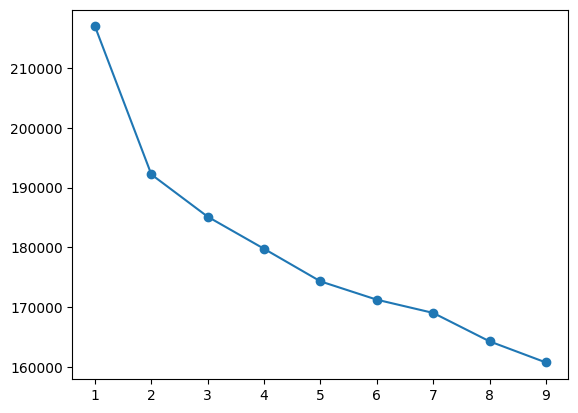

In [17]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,custo, marker='o');

### Algorithm

In [18]:
kmd = KModes(n_clusters=4, verbose=1)
kmd1 = kmd.fit_predict(df4)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


In [19]:
kmd1

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

## Dataframe segmentado

In [20]:
df5 = pd.concat([df2, pd.DataFrame(kmd1, columns=['grupo'])], axis=1)
df5

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,grupo
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,1
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,1


In [21]:
# registros por grupo
df5.grupo.value_counts()

,count
grupo,
0,22589
1,10950
2,4079
3,3570


### Filtrando dados por grupos

In [22]:
# grupo 0
df5[df5.grupo == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,grupo
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,nonexistent,0
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,nonexistent,0
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,0
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,success,0
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,0


In [23]:
# grupo 1
df5[df5.grupo == 1]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,grupo
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,1
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent,1
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41082,48,admin.,married,high.school,no,no,no,telephone,nov,tue,failure,1
41089,50,blue-collar,divorced,professional.course,no,yes,no,telephone,nov,tue,success,1
41129,61,admin.,married,high.school,no,no,no,telephone,nov,wed,nonexistent,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,1


In [24]:
# grupo 2
df5[df5.grupo == 2]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,grupo
244,30,technician,married,university.degree,unknown,no,no,telephone,may,mon,nonexistent,2
763,30,technician,married,university.degree,unknown,no,no,telephone,may,wed,nonexistent,2
768,38,technician,married,unknown,unknown,unknown,unknown,telephone,may,wed,nonexistent,2
769,30,student,single,high.school,unknown,no,no,telephone,may,wed,nonexistent,2
779,30,services,married,high.school,unknown,no,no,telephone,may,wed,nonexistent,2
...,...,...,...,...,...,...,...,...,...,...,...,...
41057,30,management,married,university.degree,no,no,yes,cellular,oct,wed,success,2
41080,27,student,single,high.school,no,no,yes,cellular,nov,tue,nonexistent,2
41093,52,technician,married,university.degree,no,no,no,cellular,nov,wed,failure,2
41096,28,services,married,high.school,no,yes,no,cellular,nov,wed,failure,2


In [25]:
# grupo 3
df5[df5.grupo == 3]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,grupo
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent,3
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,nonexistent,3
28,54,technician,single,university.degree,unknown,no,no,telephone,may,mon,nonexistent,3
53,53,admin.,single,professional.course,no,no,no,telephone,may,mon,nonexistent,3
55,55,technician,married,professional.course,unknown,yes,no,telephone,may,mon,nonexistent,3
...,...,...,...,...,...,...,...,...,...,...,...,...
41154,41,technician,married,professional.course,no,yes,no,cellular,nov,mon,nonexistent,3
41156,41,technician,married,professional.course,no,yes,no,cellular,nov,mon,nonexistent,3
41158,35,technician,divorced,basic.4y,no,no,no,cellular,nov,tue,nonexistent,3
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,success,3


### Buscando registros por indice

In [26]:
df5.iloc[1]

,1
age,57
job,services
marital,married
education,high.school
default,unknown
housing,no
loan,no
contact,telephone
month,may
day_of_week,mon


In [27]:
df5.iloc[1983]

,1983
age,40
job,blue-collar
marital,married
education,basic.9y
default,unknown
housing,yes
loan,no
contact,telephone
month,may
day_of_week,fri


### Agrupando registros

In [28]:
# idade media por grupo
df5.groupby('grupo')['age'].mean()

,age
grupo,
0,38.818274
1,41.501644
2,38.446678
3,44.923810


In [29]:
# quantidade de empregados por emprego e por grupo
df5.groupby('grupo')['job'].value_counts().unstack()

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
grupo,,,,,,,,,,,,
0,8325,3475,881,483,1988,818,946,1704,493,2769,560,147
1,1331,4656,387,296,603,346,279,1469,149,1043,277,114
2,478,870,99,164,176,219,98,620,173,1024,109,49
3,288,253,89,117,157,337,98,176,60,1907,68,20


In [30]:
# estado civil por grupo
df5.groupby('grupo')['marital'].value_counts().unstack()

marital,divorced,married,single,unknown
grupo,,,,
0,1886,13580,7077,46
1,1068,7665,2193,24
2,276,2479,1317,7
3,1382,1204,981,3


In [31]:
# registros de educacao pro grupo
df5.groupby('grupo')['education'].value_counts().unstack()

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
grupo,,,,,,,,
0,1612,1030,2889,4106,8,1937,10229,778
1,1753,943,2300,3497,6,967,904,580
2,502,256,600,1567,3,492,428,231
3,309,63,256,345,1,1847,607,142


### Queries

In [34]:
# query com 3 campos
df5.query('education == "university.degree" and grupo == 3 and marital == "married"')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,grupo
7912,56,technician,married,university.degree,no,no,yes,telephone,jun,mon,nonexistent,3
14127,53,self-employed,married,university.degree,no,no,no,cellular,jul,mon,nonexistent,3
14352,51,housemaid,married,university.degree,no,no,no,cellular,jul,mon,nonexistent,3
14410,54,management,married,university.degree,no,no,no,cellular,jul,mon,nonexistent,3
15705,53,entrepreneur,married,university.degree,no,no,no,cellular,jul,mon,nonexistent,3
...,...,...,...,...,...,...,...,...,...,...,...,...
39370,57,management,married,university.degree,no,no,no,cellular,mar,mon,nonexistent,3
40448,58,management,married,university.degree,no,no,no,cellular,aug,tue,nonexistent,3
40511,45,technician,married,university.degree,no,no,no,cellular,aug,mon,failure,3
40517,58,self-employed,married,university.degree,no,no,no,cellular,aug,tue,success,3


In [38]:
# query com 4 campos
df5.query('(education == "university.degree" and grupo == 3 and marital == "single") and (job == "housemaid" or job == "entrepreneur")')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,grupo
17334,42,entrepreneur,single,university.degree,no,no,no,cellular,jul,mon,nonexistent,3
17335,45,entrepreneur,single,university.degree,no,no,no,cellular,jul,mon,nonexistent,3
21178,38,entrepreneur,single,university.degree,no,no,no,cellular,aug,mon,nonexistent,3
29458,46,entrepreneur,single,university.degree,no,no,no,cellular,apr,mon,failure,3
29530,57,entrepreneur,single,university.degree,no,no,yes,cellular,apr,mon,nonexistent,3
38702,29,housemaid,single,university.degree,no,no,no,cellular,nov,mon,nonexistent,3
38988,49,housemaid,single,university.degree,no,no,yes,cellular,dec,mon,nonexistent,3
